In [27]:
# Instalamos las librerias necesarias que vamos necesitando
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install psycopg2


In [2]:
# Importo las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Chequeo que se han instalado bien
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", plt.matplotlib.__version__)

pandas: 2.2.3
numpy: 1.23.5
matplotlib: 3.6.3


In [5]:
# No reconocía matplotlib, así que cambio de kernel a "Python 3.8 - AzureML" y ya lo reconoce.

In [8]:
# Creo un repositorio en GitHub llamado "CasoPractico-ETL"
# Copio su URL:  https://github.com/JorgeGens/CasoPractico-ETL.git

!git --version # Para ver si lo tengo instalado en el notebook

# Inicializo GIT dentro de esta carpeta CasoPractico2
!git init




git version 2.47.0
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint:
hint: 	git config --global init.defaultBranch <name>
hint:
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint:
hint: 	git branch -m <name>
Initialized empty Git repository in /mnt/batch/tasks/shared/LS_root/mounts/clusters/jorge-gen/code/Users/contacto/CasoPractico2/.git/


In [ ]:
# Creo un token en https://github.com/settings/tokens > Generate new token ghp_............................@23

In [11]:
# Creo un archivo readme.md
#!echo "# Repositorio para el caso práctico de creación de un ETL" > README.md
#!ls -la # hacer un dir del directorio, para ver si aparece .git 


total 14
drwxrwxrwx 2 root root    0 Feb 11 08:29 .
drwxrwxrwx 2 root root    0 Nov 27 17:20 ..
-rwxrwxrwx 1 root root  315 Feb 11 08:30 .amlignore
-rwxrwxrwx 1 root root  315 Feb 11 08:30 .amlignore.amltmp
drwxrwxrwx 2 root root    0 Feb 12 11:41 .git
drwxrwxrwx 2 root root    0 Feb 11 08:29 .ipynb_aml_checkpoints
-rwxrwxrwx 1 root root   60 Feb 12 11:43 README.md
-rwxrwxrwx 1 root root 6015 Feb 12 11:43 casopractico2.ipynb
-rwxrwxrwx 1 root root 6015 Feb 12 11:43 casopractico2.ipynb.amltmp


In [4]:
# Configuro usuario y user para git
!git config --global user.email "contacto@jorgegens.com"
!git config --global user.name "Jorge Gens"

In [40]:
# Añado README.md a GIT
!git add .

# Mi primer commit
!git commit -m "subo de nuevo"

# Vinculo el repositorio local con GitHub (solo una vez)
!git remote add origin git@github.com:JorgeGens/MiRepositorioDelCurso.git

# Chequeo que quedó vinculado
!git remote -v

[main 713256b] subo de nuevo
 2 files changed, 129 insertions(+), 129 deletions(-)
error: remote origin already exists.
origin	https://github.com/JorgeGens/MiRepositorioDelCurso.git (fetch)
origin	https://github.com/JorgeGens/MiRepositorioDelCurso.git (push)


In [7]:
# Añado el directorio a la lista de directorios seguros de Git
!git config --global --add safe.directory "/mnt/batch/tasks/shared/LS_root/mounts/clusters/jorge-gen/code/Users/contacto/CasoPractico2"


In [13]:
# evito que se suba este archivo
!echo "casopractico2.jpynb" >> .gitignore

In [12]:
# Subir los archivos a GitHub
!git remote set-url origin https://github.com/JorgeGens/MiRepositorioDelCurso.git
!git add .
!git commit -m "actualizo de nuevo 2"
!git branch -M main
!git push -u origin main

[main 52866bc] actualizo de nuevo 2
 2 files changed, 8 insertions(+), 8 deletions(-)
Username for 'https://github.com': ^C


In [13]:
# Carga de datos.  Accedo a los archivos en GitHub y copio la ruta raw
ruta1 = "https://raw.githubusercontent.com/ricardoahumada/DataExpert/refs/heads/main/etapa2/data/Caracteristicas_Equipos.csv"
ruta2 = "https://raw.githubusercontent.com/ricardoahumada/DataExpert/refs/heads/main/etapa2/data/Historicos_Ordenes.csv"
ruta3 = "https://raw.githubusercontent.com/ricardoahumada/DataExpert/refs/heads/main/etapa2/data/Registros_Condiciones.csv"

caracteristicas_equipos = pd.read_csv(ruta1)
historicos_ordenes = pd.read_csv(ruta2)
registros_condiciones = pd.read_csv(ruta3)

In [14]:
# Mostrar las primeras filas del dataset
caracteristicas_equipos.sample(10)

ID_Equipo    Tipo_Equipo Fabricante Modelo  Potencia_kW  \
213        214  Transformador    Siemens   X100       2729.0   
233        234      Generador  Schneider   X100       1526.0   
287        288          Motor    Siemens   M400       4916.0   
336        337  Transformador        ABB   Z300       2109.0   
80          81      Compresor        ABB   X100        446.0   
362        363          Motor        ABB   X100        163.0   
164        165  Transformador  Schneider   Z300       1806.0   
387        388      Compresor  Schneider   Z300       3973.0   
15          16      Generador        ABB   Y200       1884.0   
74          75  Transformador    Siemens   M400       1129.0   

     Horas_Recomendadas_Revision  
213                         2209  
233                         6835  
287                         4906  
336                         8902  
80                          2659  
362                         1073  
164                         9335  
387                         5667  
15                          6904  
74                          6842

In [15]:
# Mostrar cantidad de cada valor
conteo_tipo_equipo = caracteristicas_equipos['Tipo_Equipo'].value_counts()
print(conteo_tipo_equipo)

Tipo_Equipo
Compresor        130
Transformador    126
Motor            126
Generador        123
Name: count, dtype: int64


In [16]:
# Mostrar cantidad de cada valor
conteo_tipo_equipo = caracteristicas_equipos['Fabricante'].value_counts()
print(conteo_tipo_equipo)

Fabricante
ABB          135
Schneider    127
GE           122
Siemens      121
Name: count, dtype: int64


In [17]:
# Mostrar cantidad de cada valor
conteo_tipo_equipo = caracteristicas_equipos['Modelo'].value_counts()
print(conteo_tipo_equipo)

Modelo
Y200    143
X100    125
Z300    124
M400    113
Name: count, dtype: int64


In [18]:
# Mostrar las primeras filas del dataset
historicos_ordenes.sample(10)

ID_Orden  ID_Equipo                Fecha Tipo_Mantenimiento  \
3201      3202        423  2020-05-13 09:00:00         Preventivo   
3120      3121        449  2020-05-10 00:00:00         Preventivo   
4536      4537        207  2020-07-08 00:00:00         Preventivo   
1405      1406        222  2020-02-28 13:00:00         Preventivo   
7468      7469        138  2020-11-07 04:00:00         Correctivo   
2679      2680        185  2020-04-21 15:00:00         Correctivo   
8582      8583        369  2020-12-23 14:00:00         Preventivo   
1979      1980        439  2020-03-23 11:00:00         Correctivo   
2914      2915        171  2020-05-01 10:00:00         Preventivo   
3774      3775        289  2020-06-06 06:00:00         Preventivo   

      Costo_Mantenimiento  Duracion_Horas     Ubicacion  
3201              6984.40              33   Planta Este  
3120              5133.78               3  Planta Oeste  
4536              3243.58              16  Planta Norte  
1405              5130.18              29  Planta Norte  
7468              5184.68              28  Planta Oeste  
2679              3969.25              20   Planta Este  
8582              1062.82              26  Planta Oeste  
1979              6248.01              31    Planta Sur  
2914              7136.58              33    Planta Sur  
3774               652.30              25  Planta Norte

In [19]:
# Mostrar cantidad de cada valor
conteo = historicos_ordenes['Tipo_Mantenimiento'].value_counts()
print(conteo)

Tipo_Mantenimiento
Preventivo    5037
Correctivo    4983
Name: count, dtype: int64


In [20]:
# Mostrar cantidad de cada valor
conteo = historicos_ordenes['Ubicacion'].value_counts()
print(conteo)

Ubicacion
Planta Sur      2551
Planta Este     2545
Planta Oeste    2469
Planta Norte    2455
Name: count, dtype: int64


In [21]:
# Mostrar las primeras filas del dataset
registros_condiciones.sample(10)

ID_Registro  ID_Equipo                Fecha  Temperatura_C  \
368           369         98  2020-01-16 08:00:00         122.46   
5706         5707        190  2020-08-25 18:00:00         145.05   
7724         7725         38  2020-11-17 20:00:00          77.80   
5043         5044        385  2020-07-29 03:00:00          69.24   
1808         1809        393  2020-03-16 08:00:00          83.39   
5443         5444        425  2020-08-14 19:00:00         110.03   
2718         2719         14  2020-04-23 06:00:00         115.26   
5222         5223        410  2020-08-05 14:00:00         119.82   
7076         7077        151  2020-10-21 20:00:00          52.72   
23             24        366  2020-01-01 23:00:00         122.81   

      Vibracion_mm_s  Horas_Operativas  
368             2.61           46963.0  
5706            2.51           72389.0  
7724            1.44           33702.0  
5043            0.81           33943.0  
1808            2.12           91007.0  
5443            2.98           34523.0  
2718            0.73           63358.0  
5222            3.81           79780.0  
7076            2.83           68544.0  
23              2.45           82301.0

In [22]:
# Mostrar cantidad de cada valor
conteo = registros_condiciones['ID_Equipo'].value_counts()
print(conteo)

ID_Equipo
443    31
208    31
493    30
162    29
479    28
       ..
70     10
44      9
253     9
275     8
344     8
Name: count, Length: 499, dtype: int64


In [23]:
# Miro caracteristicas de los datos de esos archivos

historicos_ordenes.info()

registros_condiciones.info()

caracteristicas_equipos.info()

# Se ve que hay valores nulos en  Costo_Mantenimient y Horas_Operativas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Orden             10020 non-null  int64  
 1   ID_Equipo            10020 non-null  int64  
 2   Fecha                10020 non-null  object 
 3   Tipo_Mantenimiento   10020 non-null  object 
 4   Costo_Mantenimiento  9971 non-null   float64
 5   Duracion_Horas       10020 non-null  int64  
 6   Ubicacion            10020 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 548.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Registro       9000 non-null   int64  
 1   ID_Equipo         9000 non-null   int64  
 2   Fecha             9000 non-null   object 
 3   Temperatura_C     9000 non-null 

In [24]:
# Identificar valores nulos, aunque se veía claro.
print(historicos_ordenes.isnull().sum())
print(registros_condiciones.isnull().sum())
print(caracteristicas_equipos.isnull().sum())

ID_Orden                0
ID_Equipo               0
Fecha                   0
Tipo_Mantenimiento      0
Costo_Mantenimiento    49
Duracion_Horas          0
Ubicacion               0
dtype: int64
ID_Registro          0
ID_Equipo            0
Fecha                0
Temperatura_C        0
Vibracion_mm_s       0
Horas_Operativas    40
dtype: int64
ID_Equipo                      0
Tipo_Equipo                    0
Fabricante                     0
Modelo                         0
Potencia_kW                    0
Horas_Recomendadas_Revision    0
dtype: int64


In [25]:
# Filtrar filas que contienen al menos un valor nulo
filas_con_nulos = historicos_ordenes[historicos_ordenes.isnull().any(axis=1)]
print(filas_con_nulos)

      ID_Orden  ID_Equipo                Fecha Tipo_Mantenimiento  \
225        226        472  2020-01-10 09:00:00         Preventivo   
580        581        254  2020-01-25 04:00:00         Correctivo   
847        848        194  2020-02-05 07:00:00         Preventivo   
929        930        253  2020-02-08 17:00:00         Correctivo   
958        959         80  2020-02-09 22:00:00         Correctivo   
1018      1019        115  2020-02-12 10:00:00         Preventivo   
1230      1231          9  2020-02-21 06:00:00         Correctivo   
1549      1550        265  2020-03-05 13:00:00         Preventivo   
2141      2142        163  2020-03-30 05:00:00         Preventivo   
2277      2278        309  2020-04-04 21:00:00         Correctivo   
2322      2323        396  2020-04-06 18:00:00         Preventivo   
2453      2454        387  2020-04-12 05:00:00         Correctivo   
2498      2499        362  2020-04-14 02:00:00         Preventivo   
3038      3039        244  2020-05

In [26]:
# Filtrar filas que contienen al menos un valor nulo
filas_con_nulos = registros_condiciones[registros_condiciones.isnull().any(axis=1)]
print(filas_con_nulos)

      ID_Registro  ID_Equipo                Fecha  Temperatura_C  \
992           993        495  2020-02-11 08:00:00          74.97   
1490         1491        341  2020-03-03 02:00:00         102.91   
1590         1591        205  2020-03-07 06:00:00          78.41   
1596         1597        373  2020-03-07 12:00:00          51.31   
2108         2109         43  2020-03-28 20:00:00         127.13   
2394         2395        330  2020-04-09 18:00:00         110.00   
2715         2716        161  2020-04-23 03:00:00          53.40   
2788         2789        209  2020-04-26 04:00:00         149.15   
2914         2915        117  2020-05-01 10:00:00         127.42   
3193         3194        219  2020-05-13 01:00:00         138.65   
3456         3457        124  2020-05-24 00:00:00         147.80   
3643         3644         98  2020-05-31 19:00:00         124.05   
3794         3795        319  2020-06-07 02:00:00         122.94   
4411         4412        436  2020-07-02 19:00:0

In [27]:
# Filtrar filas que contienen al menos un valor nulo
filas_con_nulos = caracteristicas_equipos[caracteristicas_equipos.isnull().any(axis=1)]
print(filas_con_nulos)

Empty DataFrame
Columns: [ID_Equipo, Tipo_Equipo, Fabricante, Modelo, Potencia_kW, Horas_Recomendadas_Revision]
Index: []


In [28]:
# Al traerme los datos los toma como strings. Paso los valores de fecha a datetime
# y si por lo que sea no se puede para algún valor, hago que valga Nan en lugar de que genere une error, con errors='coerce'
historicos_ordenes['Fecha'] = pd.to_datetime(historicos_ordenes['Fecha'], errors='coerce')
registros_condiciones['Fecha'] = pd.to_datetime(registros_condiciones['Fecha'], errors='coerce')

In [29]:
# Reemplazamos los valores nulos con la mediana de cada columna
# historicos_ordenes['Costo_Mantenimiento'].fillna(historicos_ordenes['Costo_Mantenimiento'].median(), inplace=True)
# registros_condiciones['Horas_Operativas'].fillna(registros_condiciones['Horas_Operativas'].median(), inplace=True)

# también podría eliminar esas filas con:
historicos_ordenes.dropna(subset=['Costo_Mantenimiento'], inplace=True)
registros_condiciones.dropna(subset=['Horas_Operativas'], inplace=True)

In [30]:
# Vamos a ver los duplicados antes de decidir borrarlos o no
#duplicados = caracteristicas_equipos[caracteristicas_equipos.duplicated(keep=False)]
#print(duplicados)

# Eliminación de Duplicados
historicos_ordenes.drop_duplicates(inplace=True)
registros_condiciones.drop_duplicates(inplace=True)
caracteristicas_equipos.drop_duplicates(inplace=True)

In [41]:
# Detección de Outliers en Columnas Clave. valores atípicos en Costo_Mantenimiento y Horas_Operativas usando el método de Rango Intercuartílico (IQR)

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

# Aplicar la detección en columnas clave
outliers_costo = detectar_outliers_iqr(historicos_ordenes, 'Costo_Mantenimiento')
outliers_horas = detectar_outliers_iqr(registros_condiciones, 'Horas_Operativas')

print("Outliers en Costo de Mantenimiento:", outliers_costo.shape[0])
print("Outliers en Horas Operativas:", outliers_horas.shape[0])


Outliers en Costo de Mantenimiento: 30
Outliers en Horas Operativas: 0


In [42]:
# Unimos los tres datasets para obtener una vista consolidada:

# Fusionamos condiciones operativas con características de equipos
merged_df = pd.merge(registros_condiciones, caracteristicas_equipos, on='ID_Equipo', how='left')

# Fusionamos con órdenes de mantenimiento solo por ID_Equipo (sin fecha exacta para capturar más datos)
df_final = pd.merge(merged_df, historicos_ordenes, on='ID_Equipo', how='left')



In [43]:
df_final

ID_Registro  ID_Equipo             Fecha_x  Temperatura_C  \
0                 1        260 2020-01-01 00:00:00         101.43   
1                 1        260 2020-01-01 00:00:00         101.43   
2                 1        260 2020-01-01 00:00:00         101.43   
3                 1        260 2020-01-01 00:00:00         101.43   
4                 1        260 2020-01-01 00:00:00         101.43   
...             ...        ...                 ...            ...   
178577         9000         61 2021-01-09 23:00:00         130.10   
178578         9000         61 2021-01-09 23:00:00         130.10   
178579         9000         61 2021-01-09 23:00:00         130.10   
178580         9000         61 2021-01-09 23:00:00         130.10   
178581         9000         61 2021-01-09 23:00:00         130.10   

        Vibracion_mm_s  Horas_Operativas Tipo_Equipo Fabricante Modelo  \
0                 1.22           71849.0   Generador        ABB   X100   
1                 1.22           71849.0   Generador        ABB   X100   
2                 1.22           71849.0   Generador        ABB   X100   
3                 1.22           71849.0   Generador        ABB   X100   
4                 1.22           71849.0   Generador        ABB   X100   
...                ...               ...         ...        ...    ...   
178577            4.06           46702.0   Compresor         GE   M400   
178578            4.06           46702.0   Compresor         GE   M400   
178579            4.06           46702.0   Compresor         GE   M400   
178580            4.06           46702.0   Compresor         GE   M400   
178581            4.06           46702.0   Compresor         GE   M400   

        Potencia_kW  Horas_Recomendadas_Revision  ID_Orden  \
0             453.0                         1909      1254   
1             453.0                         1909      1257   
2             453.0                         1909      1510   
3             453.0                         1909      1961   
4             453.0                         1909      2118   
...             ...                          ...       ...   
178577       2537.0                         1190      7425   
178578       2537.0                         1190      7559   
178579       2537.0                         1190      8124   
178580       2537.0                         1190      8229   
178581       2537.0                         1190      9903   

                   Fecha_y Tipo_Mantenimiento  Costo_Mantenimiento  \
0      2020-02-22 05:00:00         Preventivo              9995.14   
1      2020-02-22 08:00:00         Correctivo              6126.10   
2      2020-03-03 21:00:00         Preventivo              9392.22   
3      2020-03-22 16:00:00         Preventivo               243.54   
4      2020-03-29 05:00:00         Correctivo              1616.89   
...                    ...                ...                  ...   
178577 2020-11-05 08:00:00         Preventivo              3387.32   
178578 2020-11-10 22:00:00         Preventivo              2551.31   
178579 2020-12-04 11:00:00         Correctivo              4419.76   
178580 2020-12-08 20:00:00         Correctivo              2332.76   
178581 2021-02-16 14:00:00         Preventivo               411.06   

        Duracion_Horas     Ubicacion  
0                   25  Planta Norte  
1                    2  Planta Norte  
2                    6  Planta Norte  
3                   10   Planta Este  
4                   47  Planta Oeste  
...                ...           ...  
178577              43   Planta Este  
178578              35  Planta Oeste  
178579              45  Planta Oeste  
178580              22  Planta Oeste  
178581              22  Planta Oeste  

[178582 rows x 17 columns]

In [44]:
# El dataset limpio y transformado se guarda en formato CSV para futuros análisis.
df_final.to_csv("dataset_final.csv", index=False)

In [36]:
cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIDEZBWGNv4v5BizDenF6zIYThwqbsXpQ9shSDYxpH4uV contacto@jorgegens.com


In [45]:
# quizás debas usar la ruta ssh y no la https que se ve que estamos usando haciendo esto:
!cat .git/config

[core]
	repositoryformatversion = 0
	filemode = false
	bare = false
	logallrefupdates = true
	ignorecase = true
[remote "origin"]
	url = https://github.com/JorgeGens/MiRepositorioDelCurso.git
	fetch = +refs/heads/*:refs/remotes/origin/*
[branch "main"]
	remote = origin
	merge = refs/heads/main


In [47]:
# Filtrar valores fuera del rango esperado
valores_erroneos = df_final[
    (df_final['Temperatura_C']  < 0 )  | (df_final['Temperatura_C']  > 700 )  |
    (df_final['Vibracion_mm_s'] < 0 )  | (df_final['Vibracion_mm_s'] > 100 )
]

print(valores_erroneos)

        ID_Registro  ID_Equipo             Fecha_x  Temperatura_C  \
19774          1001        260 2020-02-11 16:00:00          999.0   
19775          1001        260 2020-02-11 16:00:00          999.0   
19776          1001        260 2020-02-11 16:00:00          999.0   
19777          1001        260 2020-02-11 16:00:00          999.0   
19778          1001        260 2020-02-11 16:00:00          999.0   
...             ...        ...                 ...            ...   
173498         8745        291 2020-12-30 08:00:00          999.0   
173499         8745        291 2020-12-30 08:00:00          999.0   
173500         8745        291 2020-12-30 08:00:00          999.0   
173501         8745        291 2020-12-30 08:00:00          999.0   
173502         8745        291 2020-12-30 08:00:00          999.0   

        Vibracion_mm_s  Horas_Operativas Tipo_Equipo Fabricante Modelo  \
19774             1.18           53354.0   Generador        ABB   X100   
19775             1.18 

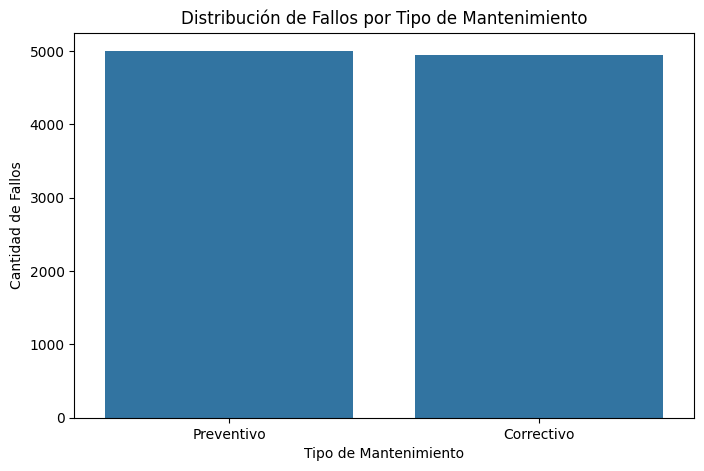

In [48]:
# Distribución de Fallos y Tipos de Mantenimiento

import seaborn as sns
import matplotlib.pyplot as plt

# Contar el número de mantenimientos por tipo
tipo_mantenimiento = historicos_ordenes['Tipo_Mantenimiento'].value_counts()

# Visualización con gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=tipo_mantenimiento.index, y=tipo_mantenimiento.values)
plt.xlabel("Tipo de Mantenimiento")
plt.ylabel("Cantidad de Fallos")
plt.title("Distribución de Fallos por Tipo de Mantenimiento")
plt.show()

                  Temperatura_C  Vibracion_mm_s  Horas_Operativas
Temperatura_C          1.000000       -0.001674          0.009831
Vibracion_mm_s        -0.001674        1.000000          0.003989
Horas_Operativas       0.009831        0.003989          1.000000


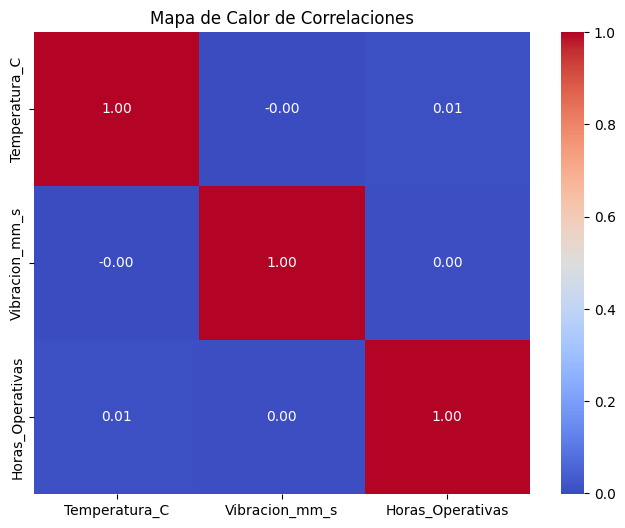

In [49]:
# Calcular la correlación entre variables
correlacion = registros_condiciones[['Temperatura_C', 'Vibracion_mm_s', 'Horas_Operativas']].corr()
print(correlacion)

# Visualización de la correlación con un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

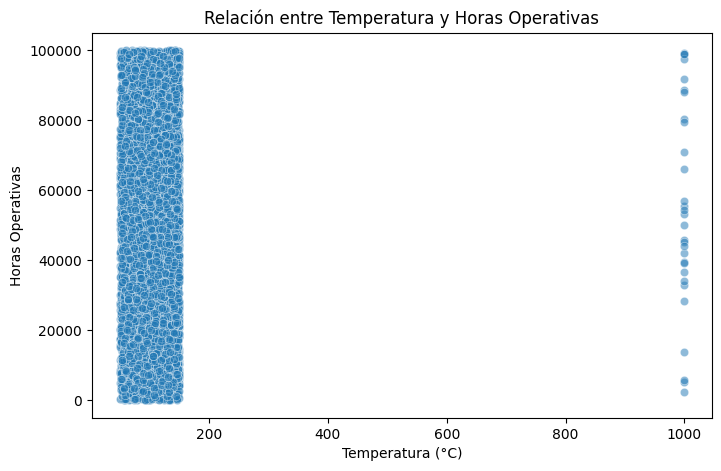

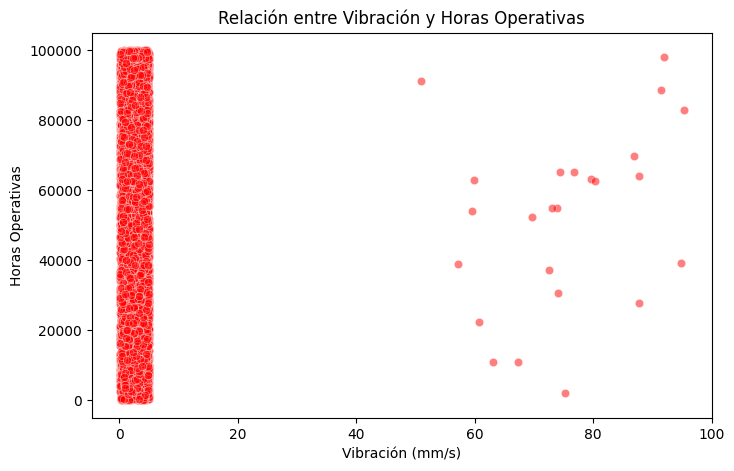

In [50]:
# Relación entre temperatura y horas operativas
plt.figure(figsize=(8,5))
sns.scatterplot(x=registros_condiciones['Temperatura_C'], y=registros_condiciones['Horas_Operativas'], alpha=0.5)
plt.xlabel("Temperatura (°C)")
plt.ylabel("Horas Operativas")
plt.title("Relación entre Temperatura y Horas Operativas")
plt.show()

# Relación entre vibración y horas operativas
plt.figure(figsize=(8,5))
sns.scatterplot(x=registros_condiciones['Vibracion_mm_s'], y=registros_condiciones['Horas_Operativas'], alpha=0.5, color='r')
plt.xlabel("Vibración (mm/s)")
plt.ylabel("Horas Operativas")
plt.title("Relación entre Vibración y Horas Operativas")
plt.show()

In [51]:
# Creo dos variables más a partir de los datos de origen para luego calcular la vida útil estimada: horas operativas y recomendación de revisión
# df_final['Vida_Util_Estimada'] = df_final['Horas_Operativas'] / df_final['Horas_Recomendadas_Revision']

# Ordenar datos por equipo y fecha para calcular la diferencia temporal
df_final = df_final.sort_values(by=['ID_Equipo', 'Fecha_x'])
df_final['Tiempo_Hasta_Fallo'] = df_final.groupby('ID_Equipo')['Fecha_x'].diff().dt.days
df_final['Tiempo_Hasta_Fallo'].fillna(df_final['Tiempo_Hasta_Fallo'].median(), inplace=True)

/tmp/ipykernel_3915/3442909614.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Tiempo_Hasta_Fallo'].fillna(df_final['Tiempo_Hasta_Fallo'].median(), inplace=True)


In [53]:
!pip install sqlalchemy


In [57]:
# Guardar en Neon

import psycopg2
from sqlalchemy import create_engine

# Configuración de la conexión a PostgreSQL

usuario = 'TestGens_owner'
contrasena = 'npg_mucgnV5OkD4t'
host = 'ep-fragrant-sun-a9a0jdor-pooler.gwc.azure.neon.tech'
puerto = '5432'
db = 'TestGens'

engine = create_engine(f'postgresql://{usuario}:{contrasena}@{host}:{puerto}/{db}')

# Guardar el dataset en PostgreSQL
df_final.to_sql("mantenimiento_equipos", engine, if_exists='replace', index=False)

582